# Modélisation et Traitement d'Images (MTI)
Mathieu Chanavat - Maxime De Beaucorps - Maxime Lanvin - Hugo Vanderperre

## Imports

In [1]:
import bm3d
from my_bm3d import BM3D
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from utilitaires import import_images, plot_imbw, get_sigma_from_SNR, ajout_bruit
%load_ext autoreload
%autoreload

In /home/maximel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/maximel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/maximel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/maximel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/maximel/anaconda3/lib/python3.7/site-packages/m

## Add Noise

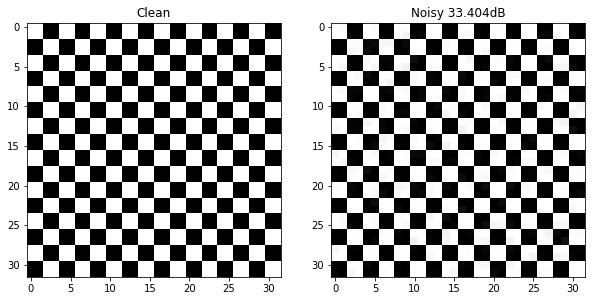

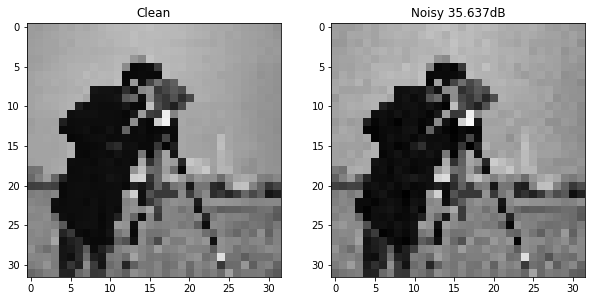

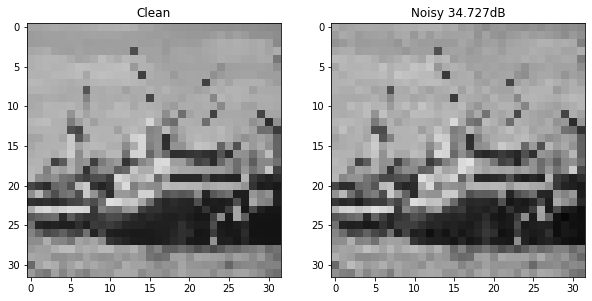

In [2]:
## Import images
images, N = import_images(size=32)
noisy_images = images.copy()
sigmas = []

for i in range(N):
    clean = images[i]
    ## Noise generation    
    sigma = get_sigma_from_SNR(30, images[i])
    sigmas.append(sigma)
    noisy = ajout_bruit(clean, sigma=sigma)
    noisy_images[i] = noisy
    psnr_noisy = psnr(noisy, clean, data_range=255)

    ## Display
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    plot_imbw(clean, ax1, title="Clean"), plot_imbw(noisy, ax2, title="Noisy " +str(round(psnr_noisy,3))+"dB")
    plt.show()

## Denoising

In [3]:
# params_gain_02dB = {
#     "N1_th": 4,
#     "N1_wie": 4,
#     "Ns": 8,
#     "N_step": 1,
#     "sigma": 2,
#     "lambda_3d": 10000,
#     "lambda_2d": 1,
#     "tau_ht_match": 10,
#     "tau_wie_match": 1 
# }


In [4]:
params = {
    "N1_th": 4,
    "N1_wie": 4,
    "Ns": 20,
    "N_step": 1,
    "sigma": 2,
    "lambda_3d": 10000,
    "lambda_2d": 1,
    "tau_ht_match": 30,
    "tau_wie_match": 1 
}


# denoiser = BM3D(np.zeros((16, 16)), **params)
# img_denoised = denoiser.denoise()


1024it [00:16, 63.75it/s]
1024it [00:13, 75.93it/s]


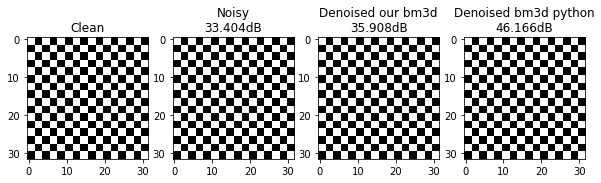

1024it [00:13, 74.38it/s]
1024it [00:12, 80.62it/s]


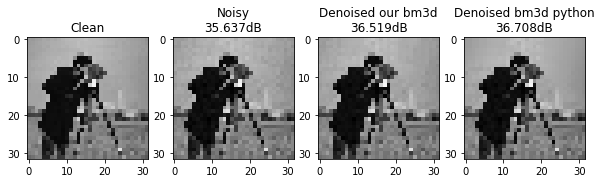

1024it [00:13, 77.32it/s]
1024it [00:13, 74.54it/s]


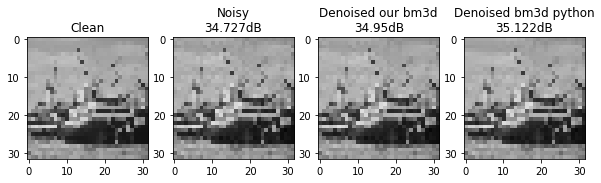

In [6]:
denoised_images = noisy.copy()

for i in range(N):
    clean = images[i]
    noisy = noisy_images[i]
    params["sigma"]=sigmas[i]
    
    ## Denoising
    denoiser = BM3D(noisy, **params)
    denoised = denoiser.denoise()
    
    ## Denoising using BM3D
    denoised_bm3d = bm3d.bm3d(noisy, sigmas[i])
    
    ## Measure PSNR
    psnr_noisy = psnr(noisy, clean, data_range=255)
    psnr_denoised = psnr(denoised, clean, data_range=255)
    psnr_denoised_bm3d = psnr(denoised_bm3d, clean, data_range=255)

    ## Display
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,6))
    plot_imbw(clean, ax1, title="Clean")
    plot_imbw(noisy, ax2, title="Noisy\n" +str(round(psnr_noisy,3))+"dB")
    plot_imbw(denoised, ax3, title="Denoised our bm3d\n" +str(round(psnr_denoised,3))+"dB")
    plot_imbw(denoised_bm3d, ax4, title="Denoised bm3d python\n" +str(round(psnr_denoised_bm3d,3))+"dB")
    
    plt.show()